In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [4]:
sep_coins = cv2.imread('DATA/pennies.jpg',0)

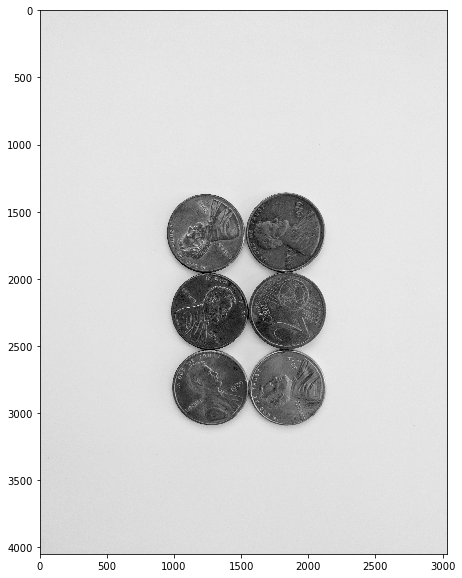

In [5]:
display(sep_coins)

In [6]:
#Median Blur
#Grayscale
#Binary Threshold
#Find Contours

In [7]:
sep_blur = cv2.medianBlur(sep_coins,25)

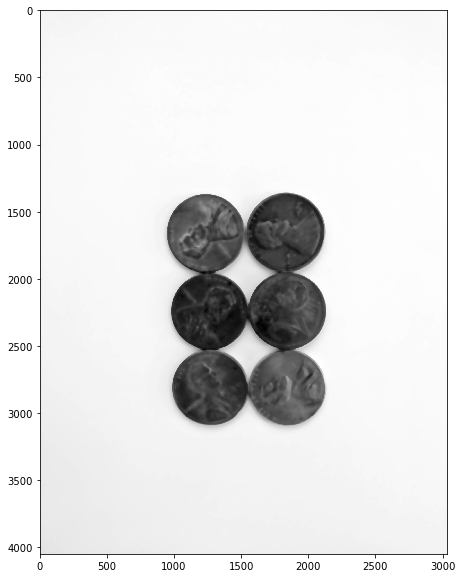

In [8]:
display(sep_blur)

In [9]:
sep_blur.shape

(4048, 3036)

In [10]:
ret, sep_thresh = cv2.threshold(sep_blur,160,255,cv2.THRESH_BINARY_INV)

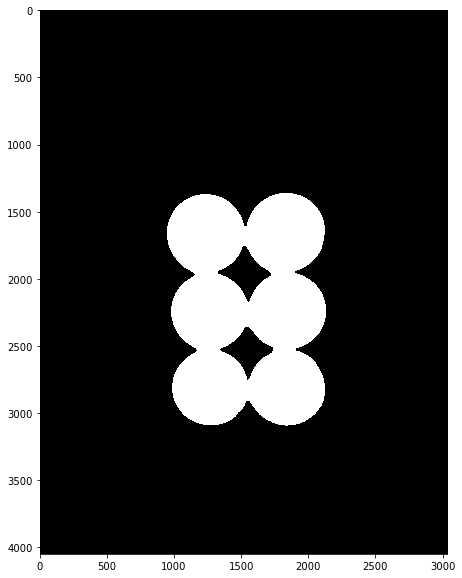

In [11]:
display(sep_thresh)

In [12]:
image,contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [14]:
image.shape

(4048, 3036)

In [16]:
len(contours)

3

In [18]:
hierarchy.shape

(1, 3, 4)

In [19]:
hierarchy

array([[[-1, -1,  1, -1],
        [ 2, -1, -1,  0],
        [-1,  1, -1,  0]]], dtype=int32)

In [35]:
sep_coins = cv2.imread('DATA/pennies.jpg')
for i in range(len(contours)):
    #if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

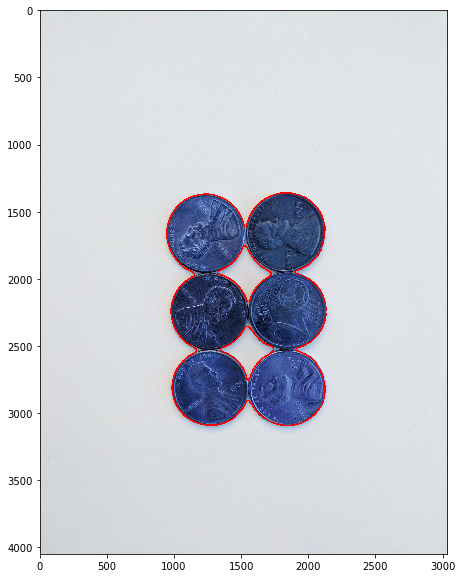

In [36]:
display(sep_coins)

In [37]:
img = cv2.imread('DATA/pennies.jpg')

In [38]:
img = cv2.medianBlur(img,35)

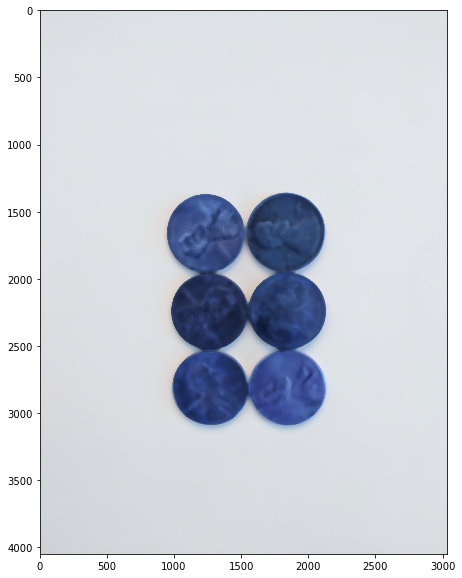

In [39]:
display(img)

In [40]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [43]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

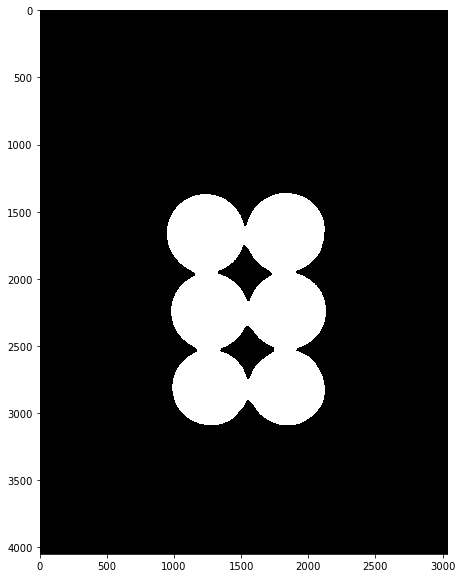

In [44]:
display(thresh)

In [45]:
#NOISE REMOVAL (OPTIONAL)

In [46]:
kernel = np.ones((3,3),np.uint8)

In [47]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [48]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

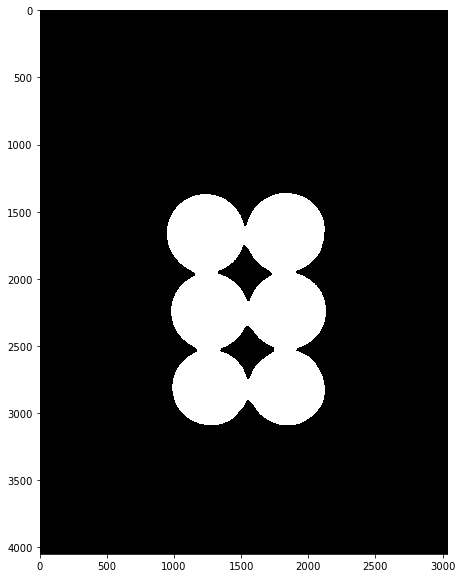

In [49]:
display(opening)

In [50]:
dist_tranform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

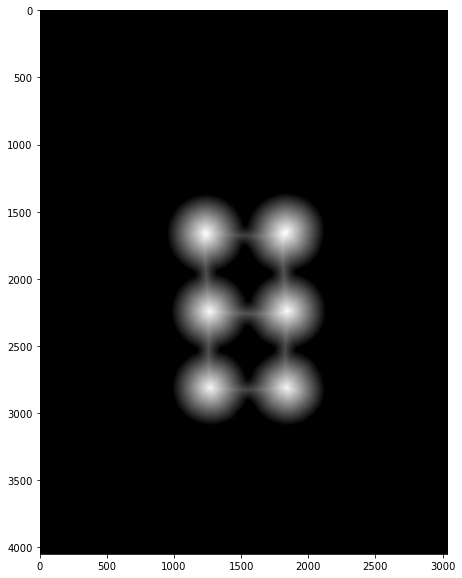

In [51]:
display(dist_tranform)

In [52]:
ret, sure_fg = cv2.threshold(dist_tranform,0.7*dist_tranform.max(),255,0)

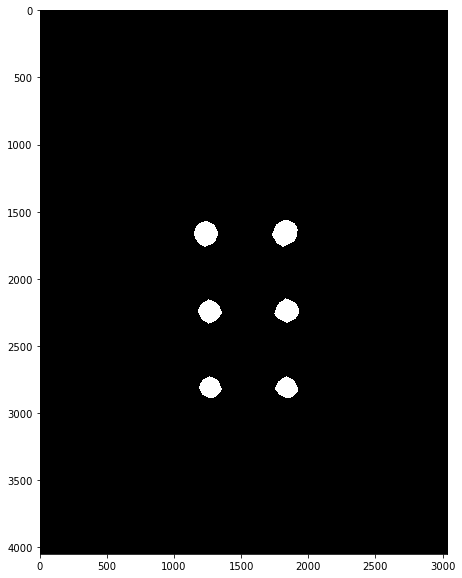

In [53]:
display(sure_fg)

In [54]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

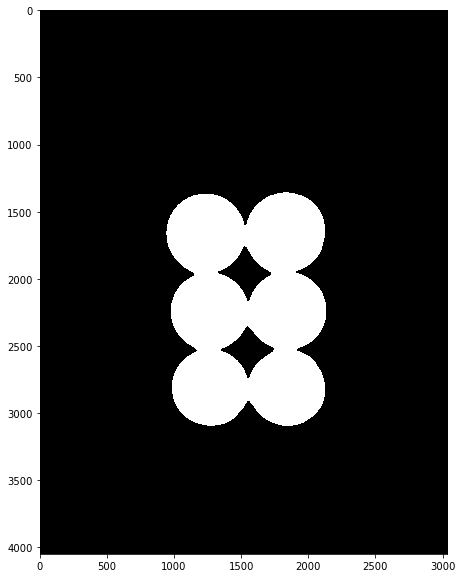

In [55]:
display(sure_bg)

In [56]:
sure_fg = np.uint8(sure_fg)

In [57]:
unknow = cv2.subtract(sure_bg,sure_fg)

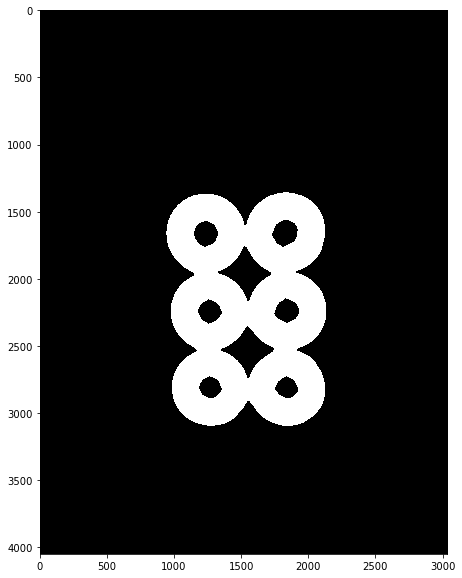

In [58]:
display(unknow)

In [68]:
ret, markers = cv2.connectedComponents(sure_fg)

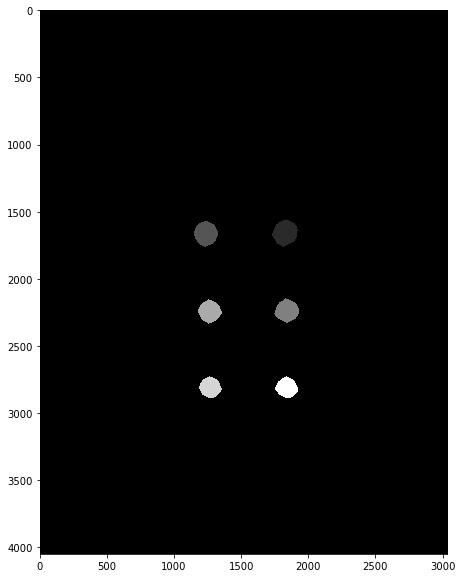

In [69]:
display(markers)

In [70]:
markers = markers + 1

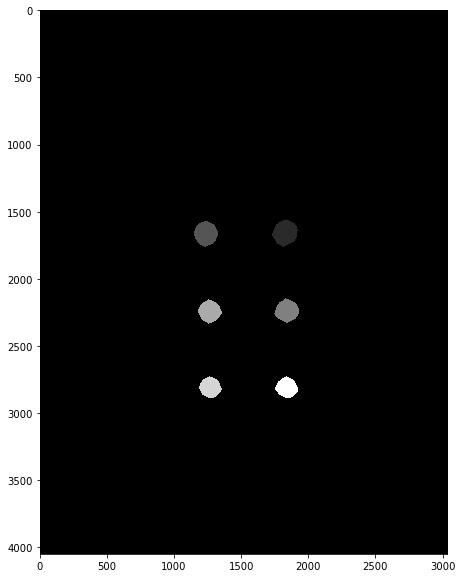

In [71]:
display(markers)

In [72]:
markers.shape

(4048, 3036)

In [73]:
unknow.shape

(4048, 3036)

In [74]:
markers[unknow==255] = 0

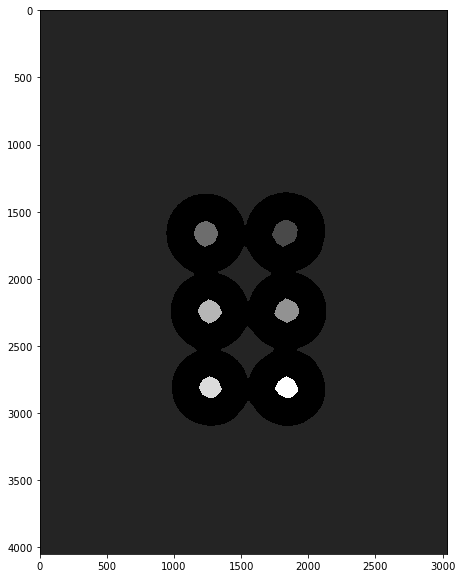

In [75]:
display(markers)

In [76]:
markers

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [77]:
markers = cv2.watershed(img,markers)

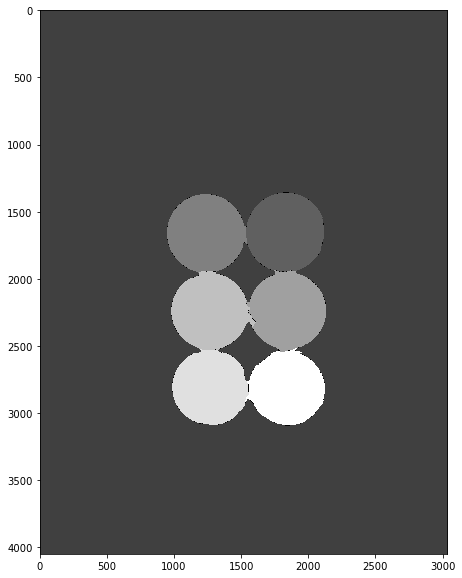

In [78]:
display(markers)

In [79]:
image,contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img,contours,i,(255,0,0),10)

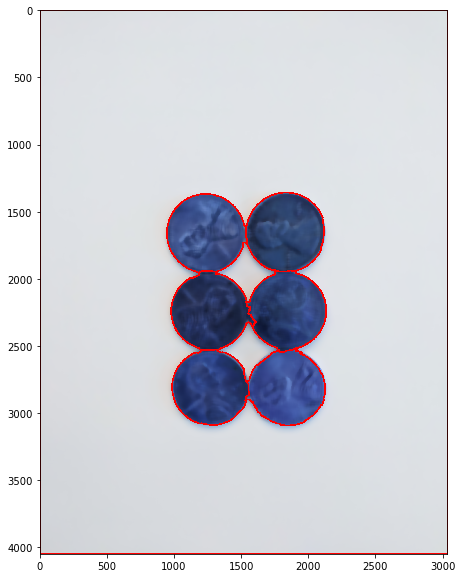

In [80]:
display(img)